# EDA – Unión de Reseñas y Metadata de Negocios Estado de California

Este notebook carga y une los archivos de reseñas y metadata de negocios usando `gmap_id`, y luego filtra los negocios que son restaurantes.

## 1. Importación de librerías

In [1]:
import pandas as pd
import os
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

## 2. Carga de reseñas (California – 18 archivos)

In [2]:
folder_reviews = '/Users/michel/Desktop/Proyecto Grupal Axon/Datasets Google/review-California'
reviews = []
for i in range(1, 19):
    path = os.path.join(folder_reviews, f'{i}.json')
    df = pd.read_json(path, lines=True)
    reviews.append(df)
df_reviews = pd.concat(reviews, ignore_index=True)
df_reviews.shape

(2700000, 8)

## 3. Carga de metadata de negocios (sitios – 11 archivos)

In [3]:
folder_sitios = '/Users/michel/Desktop/Proyecto Grupal Axon/Datasets Google/metadata-sitios'
sitios = []
for i in range(1, 12):
    path = os.path.join(folder_sitios, f'{i}.json')
    df = pd.read_json(path, lines=True)
    sitios.append(df)
df_sitios = pd.concat(sitios, ignore_index=True)
df_sitios.shape

(3025011, 15)

## 4. Unión de reseñas con metadata de negocios usando `gmap_id`

In [4]:
df_merged = pd.merge(df_reviews, df_sitios, on='gmap_id', how='inner')
print("Shape del DataFrame combinado:", df_merged.shape)
df_merged.head()

Shape del DataFrame combinado: (2727886, 22)


,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,address,...,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",...,-118.29213,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
1,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",...,-118.29213,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,1.112903e+20,Rafa Robles,1612849648663,5,Good very good,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",...,-118.29213,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,1.112903e+20,Rafa Robles,1612849648663,5,Good very good,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",...,-118.29213,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,1.126404e+20,David Han,1583643882296,4,They make Korean traditional food very properly.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",...,-118.29213,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


## 5. Filtrado de restaurantes por categoría

In [13]:
# Convertimos a minúsculas para evitar errores por mayúsculas o espacios
df_merged['category'] = df_merged['category'].astype(str).str.lower()

# Filtrar negocios que estén categorizados como 'fast food' solamente
df_fast_food = df_merged[
    df_merged['category'].str.contains("fast food", na=False)
]

print(f"Negocios identificados como fast food: {df_fast_food.shape[0]}")
df_fast_food[['name_y', 'address', 'category']].drop_duplicates().head()


Negocios identificados como fast food: 193185


,name_y,address,category
1798,Cowboy Burgers & BBQ,"Cowboy Burgers & BBQ, 13101 Ramona Blvd, Baldw...","['hamburger restaurant', 'american restaurant'..."
4738,WaBa Grill,"WaBa Grill, 2209 E Baseline Rd Ste 600, Clarem...","['asian fusion restaurant', 'asian restaurant'..."
6232,McDonald's,"McDonald's, 1205 S Main St, Manteca, CA 95336","['fast food restaurant', 'breakfast restaurant..."
11672,Subway,"Subway, 1970 Broadway Lower Level, Oakland, CA...","['sandwich shop', 'fast food restaurant', 'tak..."
14504,Baguette Bros,"Baguette Bros, 4698 Convoy St Home Economics A...","['vietnamese restaurant', 'asian fusion restau..."


##  Análisis General del Dataset de Restaurantes
Este análisis explora la calidad y características principales del dataset de restaurantes filtrado a partir de la unión de reseñas y metadata de negocios en Google Maps (estado de Oregon).


###  1. Información general del DataFrame
Dimensiones, tipos de columnas y cantidad de datos disponibles.


In [14]:
df_fast_food.info()


<class 'pandas.core.frame.DataFrame'>
Index: 193185 entries, 1798 to 2723730
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           193185 non-null  float64
 1   name_x            193185 non-null  object 
 2   time              193185 non-null  int64  
 3   rating            193185 non-null  int64  
 4   text              101258 non-null  object 
 5   pics              3317 non-null    object 
 6   resp              9584 non-null    object 
 7   gmap_id           193185 non-null  object 
 8   name_y            193185 non-null  object 
 9   address           193185 non-null  object 
 10  description       181401 non-null  object 
 11  latitude          193185 non-null  float64
 12  longitude         193185 non-null  float64
 13  category          193185 non-null  object 
 14  avg_rating        193185 non-null  float64
 15  num_of_reviews    193185 non-null  int64  
 16  price             187

###  2. Valores nulos por columna
Revisamos cuántos datos faltan por cada campo importante.


In [15]:
df_fast_food.isnull().sum().sort_values(ascending=False)


pics                189868
resp                183601
text                 91927
description          11784
price                 5288
hours                 4438
state                 4132
relative_results      2643
MISC                    16
name_x                   0
time                     0
rating                   0
user_id                  0
name_y                   0
category                 0
longitude                0
latitude                 0
address                  0
gmap_id                  0
num_of_reviews           0
avg_rating               0
url                      0
dtype: int64

###  3. Estadísticas numéricas básicas
Análisis descriptivo de las variables numéricas clave.


In [16]:
df_fast_food[['rating', 'avg_rating', 'num_of_reviews']].describe()


,rating,avg_rating,num_of_reviews
count,193185.000000,193185.000000,193185.000000
mean,4.081916,4.023816,1127.188876
std,1.208433,0.387428,1044.130724
min,1.000000,1.600000,7.000000
25%,4.000000,3.700000,448.000000
50%,5.000000,4.000000,898.000000
75%,5.000000,4.400000,1478.000000
max,5.000000,5.000000,5068.000000


###  4. Distribución de puntuaciones
Gráfico de barras con la frecuencia de cada rating de reseñas individuales.


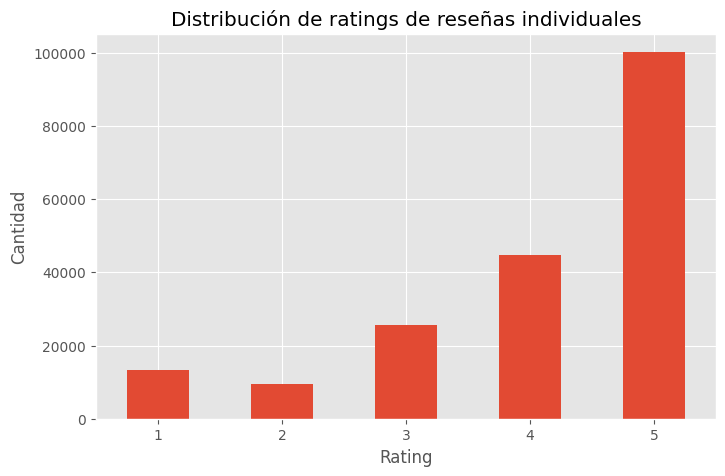

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df_fast_food['rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribución de ratings de reseñas individuales")
plt.xlabel("Rating")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.show()


###  5. Top categorías más frecuentes
Exploramos las categorías más comunes dentro de los restaurantes identificados.


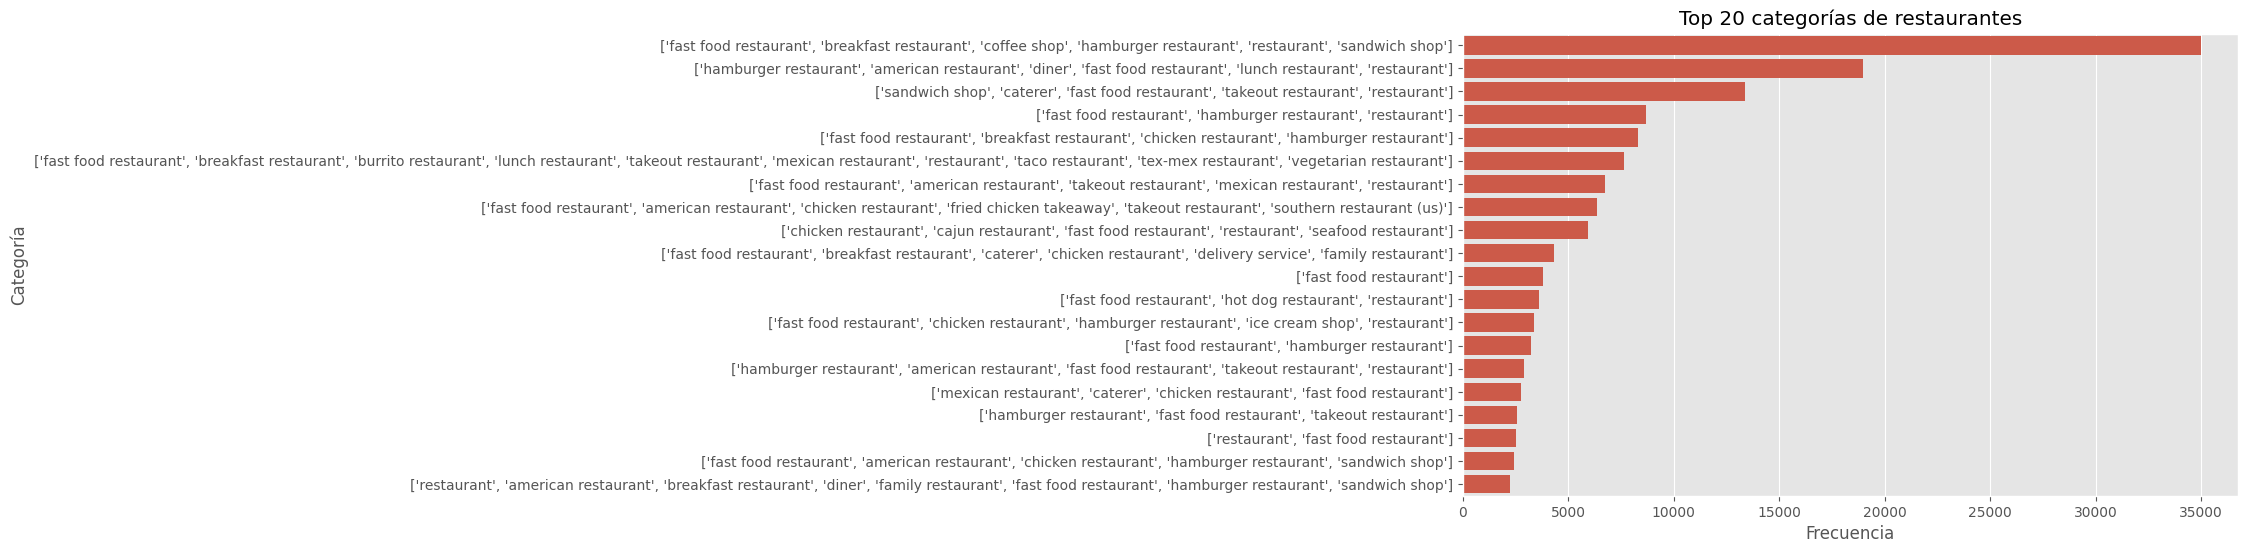

In [18]:
from collections import Counter
import seaborn as sns

todas_las_categorias = df_fast_food['category'].explode()
categorias_contadas = Counter([cat.lower() for cat in todas_las_categorias if isinstance(cat, str)])
top_20 = pd.DataFrame(categorias_contadas.most_common(20), columns=['Categoría', 'Frecuencia'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_20, y='Categoría', x='Frecuencia')
plt.title("Top 20 categorías de restaurantes")
plt.xlabel("Frecuencia")
plt.ylabel("Categoría")
plt.show()


###  6. Restaurantes con más reseñas
Identificamos los restaurantes con mayor número total de reseñas.


In [19]:
df_fast_food.groupby('name_y')['num_of_reviews'].sum().sort_values(ascending=False).head(10)


name_y
In-N-Out Burger                   61222248
McDonald's                        47243881
Raising Cane's Chicken Fingers    18143098
Wendy's                            9466176
Jack in the Box                    6556397
Taco Bell                          6181573
Chick-fil-A                        5894279
The Habit Burger Grill             5460468
El Huero Drive Thru                4690764
Popeyes Louisiana Kitchen          4453783
Name: num_of_reviews, dtype: int64

###  7. Distribución geográfica general
Visualizamos una muestra aleatoria de restaurantes en el espacio geográfico (latitud/longitud).


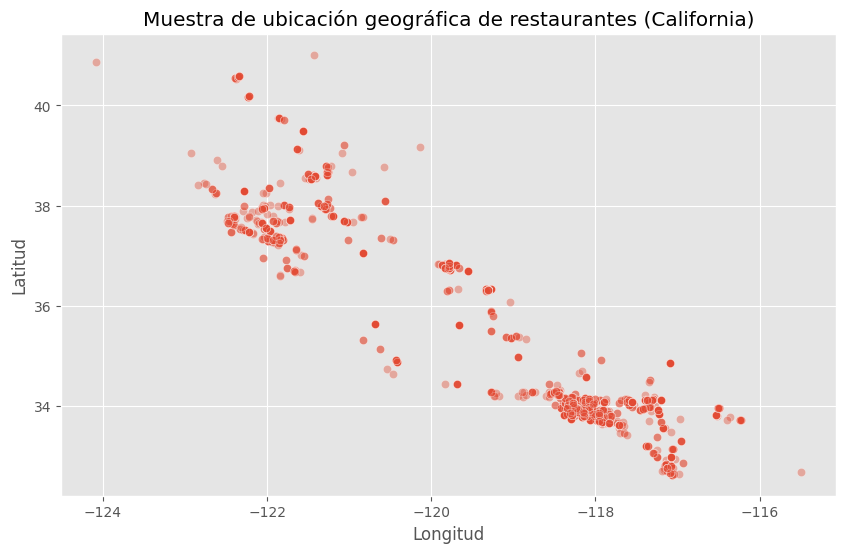

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', data=df_fast_food.sample(2000), alpha=0.4)
plt.title("Muestra de ubicación geográfica de restaurantes (California)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


###  8. Restaurantes con más reseñas (visualización)
Mostramos los 10 restaurantes más reseñados del dataset con un gráfico de barras horizontal.


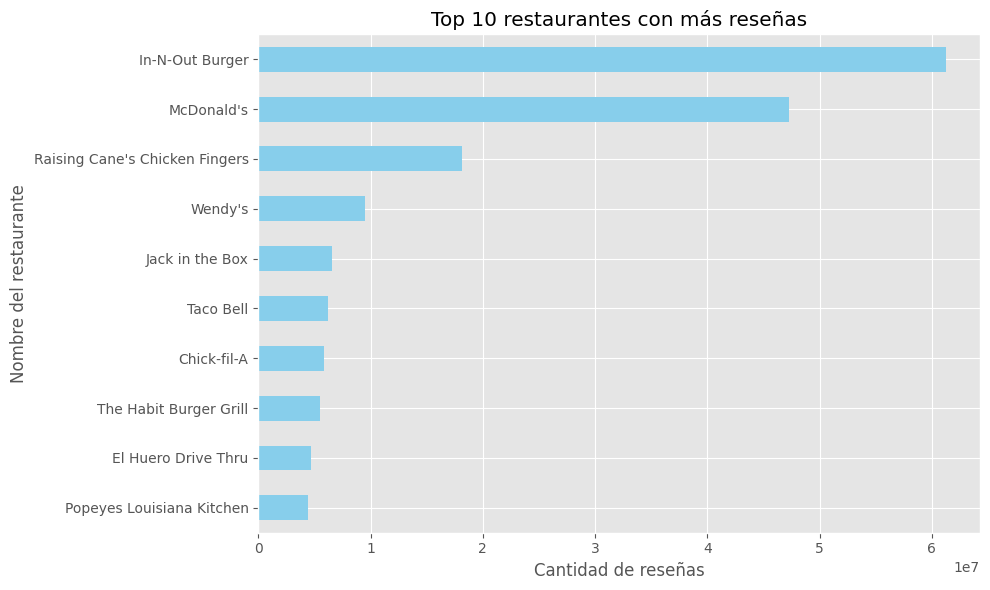

In [23]:
# Agrupar y ordenar
top_restaurantes = df_fast_food.groupby('name_y')['num_of_reviews'].sum().sort_values(ascending=False).head(10)

# Graficar
plt.figure(figsize=(10,6))
top_restaurantes.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 10 restaurantes con más reseñas")
plt.xlabel("Cantidad de reseñas")
plt.ylabel("Nombre del restaurante")
plt.tight_layout()
plt.show()

### 9. Detección de Outliers

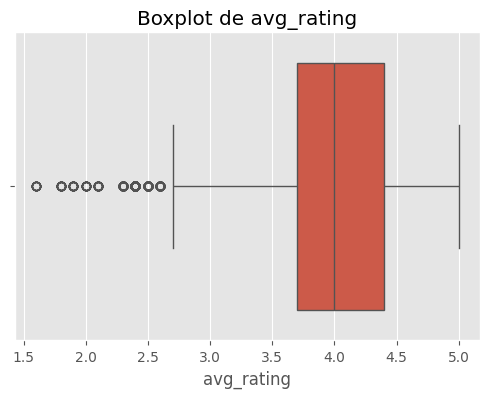

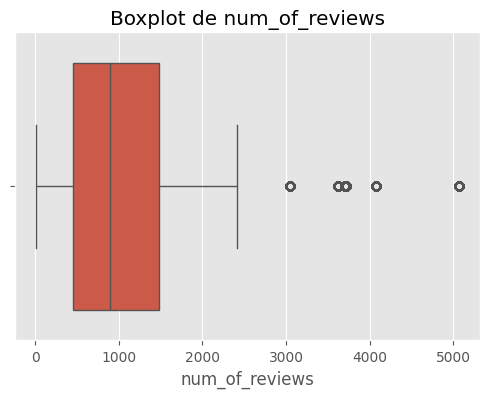

Outliers en 'avg_rating': 444 registros
Outliers en 'num_of_reviews': 15353 registros


In [24]:
# ---------- 1. Boxplot de avg_rating ----------
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_fast_food["avg_rating"])
plt.title("Boxplot de avg_rating")
plt.show()

# ---------- 2. Boxplot de num_of_reviews ----------
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_fast_food["num_of_reviews"])
plt.title("Boxplot de num_of_reviews")
plt.show()

# ---------- 3. Detectar outliers con IQR ----------
def detectar_outliers(col):
    Q1 = df_fast_food[col].quantile(0.25)
    Q3 = df_fast_food[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_fast_food[(df_fast_food[col] < Q1 - 1.5 * IQR) | (df_fast_food[col] > Q3 + 1.5 * IQR)]
    print(f"Outliers en '{col}': {outliers.shape[0]} registros")
    return outliers

outliers_rating = detectar_outliers("avg_rating")
outliers_reviews = detectar_outliers("num_of_reviews")

### 10. Eliminar columnas innecesarias

In [27]:

columnas_a_eliminar = ['pics', 'resp', 'MISC', 'state', 'price', 'description', 'relative_results']
df_fast_food.drop(columns=columnas_a_eliminar, inplace=True, errors='ignore')

# Verificar que ya no estén
df_fast_food.columns

Index(['user_id', 'name_x', 'time', 'rating', 'text', 'gmap_id', 'name_y',
       'address', 'latitude', 'longitude', 'category', 'avg_rating',
       'num_of_reviews', 'hours', 'url'],
      dtype='object')

In [28]:
# Seleccionar 10 restaurantes aleatorios
restaurantes_muestra = df_fast_food.sample(10, random_state=42)

# Mostrar toda la información de esos restaurantes
restaurantes_muestra

,user_id,name_x,time,rating,text,gmap_id,name_y,address,latitude,longitude,category,avg_rating,num_of_reviews,hours,url
1302705,1.043663e+20,darla R,1544030849279,5,Yes n yes off university in riverside ca,0x80dcae22f9438fdd:0x4b3929f4bc2e6efc,Church's Chicken,"Church's Chicken, 1886 University Ave, Riversi...",33.975337,-117.352420,"['chicken restaurant', 'family restaurant', 'f...",3.9,754,"[[Monday, 10AM–10PM], [Tuesday, 10AM–10PM], [W...",https://www.google.com/maps/place//data=!4m2!3...
2722522,1.099444e+20,Talia K,1543093287203,5,An excellent place to eat good salad or a sand...,0x80c290cd5fcce25d:0x296bf3eca368d132,Wendy's,"Wendy's, 14645 Roscoe Blvd, Panorama City, CA ...",34.221861,-118.451103,"['fast food restaurant', 'hamburger restaurant...",4.0,1671,"[[Sunday, 6:30AM–11PM], [Monday, 6:30AM–11PM],...",https://www.google.com/maps/place//data=!4m2!3...
1331275,1.010073e+20,David Molina,1547334080028,1,"Wow, ""NO"" on the military discount. That's hor...",0x80c2d3bdcec6e783:0x49d052d2a2ea70f8,Popeyes Louisiana Kitchen,"Popeyes Louisiana Kitchen, 12520 Washington Bl...",33.967759,-118.044470,"['chicken restaurant', 'cajun restaurant', 'fa...",3.9,1158,"[[Monday, 10AM–10PM], [Tuesday, 10AM–10PM], [W...",https://www.google.com/maps/place//data=!4m2!3...
2550847,1.144245e+20,Farbod Ghiasi,1513822793891,5,None,0x808fa3a8bfdc3291:0x2270807b1f6067c9,McDonald's,"McDonald's, 185 Chestnut St, Redwood City, CA ...",37.479261,-122.224261,"['fast food restaurant', 'breakfast restaurant...",3.6,898,"[[Tuesday, Open 24 hours], [Wednesday, Open 24...",https://www.google.com/maps/place//data=!4m2!3...
2280744,1.150461e+20,Teresa Sculpts,1554092892080,1,None,0x80eccf8cee6bac13:0xfb6aa285b35839e1,McDonald's,"McDonald's, 2715 Black Oak Dr, Paso Robles, CA...",35.642786,-120.686467,"['fast food restaurant', 'breakfast restaurant...",3.6,1188,"[[Wednesday, 5AM–12AM], [Thursday, 5AM–12AM], ...",https://www.google.com/maps/place//data=!4m2!3...
2568730,1.179927e+20,peggy perez,1515856604788,4,None,0x86d60a9fda5d1c69:0xbdde4994a5f034b4,In-N-Out Burger,"In-N-Out Burger, 600 S Brookhurst St, Anaheim,...",33.824842,-117.958514,"['hamburger restaurant', 'american restaurant'...",4.6,3619,"[[Monday, 10:30AM–1AM], [Tuesday, 10:30AM–1AM]...",https://www.google.com/maps/place//data=!4m2!3...
1404597,1.108721e+20,RickyBobby Hong,1563169010296,5,None,0x80c2c35387cbaf69:0xc2458435391f6ff5,Subway,"Subway, 1667 E Colorado Blvd, Pasadena, CA 91106",34.146234,-118.115989,"['fast food restaurant', 'takeout restaurant',...",4.1,77,"[[Monday, 9AM–9PM], [Tuesday, 9AM–9PM], [Wedne...",https://www.google.com/maps/place//data=!4m2!3...
1701879,1.082550e+20,Gregorio Lopez,1539750223580,2,None,0x80c2c00515120d87:0x5688115dd343e685,McDonald's,"McDonald's, 1634 W Glenoaks Blvd, Glendale, CA...",34.170505,-118.289451,"['fast food restaurant', 'breakfast restaurant...",3.8,878,"[[Saturday, Open 24 hours], [Sunday, 4AM–1:30A...",https://www.google.com/maps/place//data=!4m2!3...
2369972,1.090844e+20,Beatriz Pimentel,1617905065914,2,None,0x80946755bd2019c3:0xe0d18870ec468997,McDonald's,"McDonald's, 1248 N Blackstone Ave, Fresno, CA ...",36.758677,-119.790141,"['fast food restaurant', 'breakfast restaurant...",3.6,1185,"[[Tuesday, 5:30AM–11PM], [Wednesday, 5:30AM–11...",https://www.google.com/maps/place//data=!4m2!3...
2573068,1.086790e+20,Alan Aguilera,1525908485849,5,Even though they where extremely busy they are...,0x80dcde0dafec4d33:0x92865f367ab73b7c,In-N-Out Burger,"In-N-Out Burger, 4115 Campus Dr, Irvine, CA 92...",33.650166,-117.840644,"['hamburger restaurant', 'american restaurant'...",4.6,2198,"[[Monday, 10:30AM–1AM], [Tuesday, 10:30AM–1AM]...",https://www.google.com/maps/place//data=!4m2!3...


## ⭐️ Top locales únicos con más reseñas

In [30]:
# Agrupar por negocio (gmap_id), obtener la info relevante
top_locales_unicos = (
    df_fast_food
    .drop_duplicates(subset=["gmap_id"])
    .sort_values("num_of_reviews", ascending=False)
)

# Mostrar los top 10 únicos
top_locales_unicos[['name_y', 'address', 'category', 'avg_rating', 'num_of_reviews']].head(10)


,name_y,address,category,avg_rating,num_of_reviews
2538409,In-N-Out Burger,"In-N-Out Burger, 1275 Dana Dr, Redding, CA 960...","['hamburger restaurant', 'american restaurant'...",4.6,5068
2612366,In-N-Out Burger,"In-N-Out Burger, 1933 S Mooney Blvd, Visalia, ...","['hamburger restaurant', 'american restaurant'...",4.6,4078
2230993,Raising Cane's Chicken Fingers,"Raising Cane's Chicken Fingers, 3150 Harbor Bl...","['fast food restaurant', 'american restaurant'...",4.5,3720
2695458,In-N-Out Burger,"In-N-Out Burger, 4302 N Blackstone Ave, Fresno...","['hamburger restaurant', 'american restaurant'...",4.6,3711
2567304,In-N-Out Burger,"In-N-Out Burger, 600 S Brookhurst St, Anaheim,...","['hamburger restaurant', 'american restaurant'...",4.6,3619
2685131,El Huero Drive Thru,"El Huero Drive Thru, 3000 S Figueroa St, Los A...","['mexican restaurant', 'fast food restaurant']",4.4,3042
2594154,In-N-Out Burger,"In-N-Out Burger, 8010 N Blackstone Ave, Fresno...","['hamburger restaurant', 'american restaurant'...",4.7,2408
1450915,McDonald's,"McDonald's, 11170 Long Beach Blvd, Lynwood, CA...","['fast food restaurant', 'breakfast restaurant...",3.8,2384
2074008,Raising Cane's Chicken Fingers,"Raising Cane's Chicken Fingers, 23971 El Toro ...","['fast food restaurant', 'american restaurant'...",4.5,2370
2626464,Shake Shack,"Shake Shack, 6201 Hollywood Blvd, Los Angeles,...","['hamburger restaurant', 'american restaurant'...",4.3,2213


In [31]:
# Confirmar estructura final
print("✅ Dataset limpio y listo para análisis de sentimiento o visualización:")
print(f"Registros: {df_fast_food.shape[0]}  |  Columnas: {df_fast_food.shape[1]}")
df_fast_food.head()


✅ Dataset limpio y listo para análisis de sentimiento o visualización:
Registros: 193185  |  Columnas: 15


,user_id,name_x,time,rating,text,gmap_id,name_y,address,latitude,longitude,category,avg_rating,num_of_reviews,hours,url
1798,1.089843e+20,Edgar Alexander Lara,1618290206946,4,A delicious variety of food. Good place to go ...,0x80c2d765f8c90a3d:0x16afb75943e7ad50,Cowboy Burgers & BBQ,"Cowboy Burgers & BBQ, 13101 Ramona Blvd, Baldw...",34.079995,-117.988951,"['hamburger restaurant', 'american restaurant'...",3.7,38,"[[Thursday, 6AM–9PM], [Friday, 6AM–9PM], [Satu...",https://www.google.com/maps/place//data=!4m2!3...
1799,1.089843e+20,Edgar Alexander Lara,1618290206946,4,A delicious variety of food. Good place to go ...,0x80c2d765f8c90a3d:0x16afb75943e7ad50,Cowboy Burgers & BBQ,"Cowboy Burgers & BBQ, 13101 Ramona Blvd, Baldw...",34.079995,-117.988951,"['hamburger restaurant', 'american restaurant'...",3.7,38,"[[Thursday, 6AM–9PM], [Friday, 6AM–9PM], [Satu...",https://www.google.com/maps/place//data=!4m2!3...
1800,1.022832e+20,Selena Mejia,1402884790840,1,I use to love cowboys ever since I was a teen....,0x80c2d765f8c90a3d:0x16afb75943e7ad50,Cowboy Burgers & BBQ,"Cowboy Burgers & BBQ, 13101 Ramona Blvd, Baldw...",34.079995,-117.988951,"['hamburger restaurant', 'american restaurant'...",3.7,38,"[[Thursday, 6AM–9PM], [Friday, 6AM–9PM], [Satu...",https://www.google.com/maps/place//data=!4m2!3...
1801,1.022832e+20,Selena Mejia,1402884790840,1,I use to love cowboys ever since I was a teen....,0x80c2d765f8c90a3d:0x16afb75943e7ad50,Cowboy Burgers & BBQ,"Cowboy Burgers & BBQ, 13101 Ramona Blvd, Baldw...",34.079995,-117.988951,"['hamburger restaurant', 'american restaurant'...",3.7,38,"[[Thursday, 6AM–9PM], [Friday, 6AM–9PM], [Satu...",https://www.google.com/maps/place//data=!4m2!3...
1802,1.113197e+20,Roderick Conwi,1456090359368,4,If you like going to mom and pop burger joints...,0x80c2d765f8c90a3d:0x16afb75943e7ad50,Cowboy Burgers & BBQ,"Cowboy Burgers & BBQ, 13101 Ramona Blvd, Baldw...",34.079995,-117.988951,"['hamburger restaurant', 'american restaurant'...",3.7,38,"[[Thursday, 6AM–9PM], [Friday, 6AM–9PM], [Satu...",https://www.google.com/maps/place//data=!4m2!3...


In [33]:
# Filtrar nombres que realmente comienzan con "In-N-Out"
in_n_out = df_fast_food[df_fast_food['name_y'].str.match(r'^in[- ]?n[- ]?out', case=False, na=False)]

print(f"Total estimado de locales de In-N-Out: {in_n_out.shape[0]}")
in_n_out[['name_y', 'address', 'avg_rating', 'num_of_reviews']].drop_duplicates().head(10)


Total estimado de locales de In-N-Out: 18984


,name_y,address,avg_rating,num_of_reviews
361377,In-N-Out Burger,"In-N-Out Burger, 3483 Van Buren Boulevard, Riv...",5.0,73
1338550,In-N-Out Burger,"In-N-Out Burger, 11880 Carmel Mountain Rd, Car...",4.7,1685
1514804,In-N-Out Burger,"In-N-Out Burger, 3900 Pelandale Ave, Modesto, ...",4.6,1779
2416633,In-N-Out Burger,"In-N-Out Burger, 820 W Imola Ave, Napa, CA 945...",4.6,1742
2538409,In-N-Out Burger,"In-N-Out Burger, 1275 Dana Dr, Redding, CA 960...",4.6,5068
2567304,In-N-Out Burger,"In-N-Out Burger, 600 S Brookhurst St, Anaheim,...",4.6,3619
2572764,In-N-Out Burger,"In-N-Out Burger, 4115 Campus Dr, Irvine, CA 92...",4.6,2198
2594154,In-N-Out Burger,"In-N-Out Burger, 8010 N Blackstone Ave, Fresno...",4.7,2408
2612366,In-N-Out Burger,"In-N-Out Burger, 1933 S Mooney Blvd, Visalia, ...",4.6,4078
2667946,In-N-Out Burger,"In-N-Out Burger, 82043 CA-111, Indio, CA 92201...",4.6,1440
